# Psychoinformatics - Week 4 (Exercises)
by 張天瑋 B09705049

## 進一步搜尋 Boy-Girl 版資訊 (8 points)

1. index.html 右上角 [< 上頁 ] 中包含了總頁數資訊，請用 LXML 抓出此經常變動的數字。(2 points)

In [91]:
import requests 
import lxml.html
URI = 'https://www.ptt.cc/bbs/Boy-Girl/index.html'
r = requests.get(URI)

In [92]:
data = lxml.html.fromstring(r.text)
preButton = data.xpath('//div[@class="btn-group btn-group-paging"]//a')[1]
print(preButton.xpath('@href')[0])

/bbs/Boy-Girl/index5886.html


2. 請用 LXML 找出距離現在時間最近的一篇[爆]文標題與 URN (有可能需要翻頁) 。(3 points)

In [93]:
def getPrePageURI(URI):
    r = requests.get(URI)
    data = lxml.html.fromstring(r.text)
    preButton = data.xpath('//div[@class="btn-group btn-group-paging"]//a')[1]
    return('https://www.ptt.cc' + preButton.xpath('@href')[0])

In [97]:
def getMostRecentBombArticle(URI):
    r = requests.get(URI)
    data = lxml.html.fromstring(r.text)
    bombArticles = data.xpath('//span[@class="hl f1"]')
    if len(bombArticles) > 0:
        title = bombArticles[0].xpath('../../div[@class="title"]/a/text()')[0]
        URN = bombArticles[0].xpath('../../div[@class="title"]/a/@href')[0]
        return(title , URN)
    else:
        title , URN = getMostRecentBombArticle(getPrePageURI(URI))
        return(title , URN)

In [98]:
URI = 'https://www.ptt.cc/bbs/Boy-Girl/index.html'
title , URN = getMostRecentBombArticle(URI)
print("title : ", title)
print("URN : ", URN)

title :  [分享] 交往17年 分手啦~~~
URN :  /bbs/Boy-Girl/M.1664394118.A.745.html


3. 請用 Selenium 在 index.html 往前翻三頁，每頁拍一張照片，在notebook內顯示。(3 points)

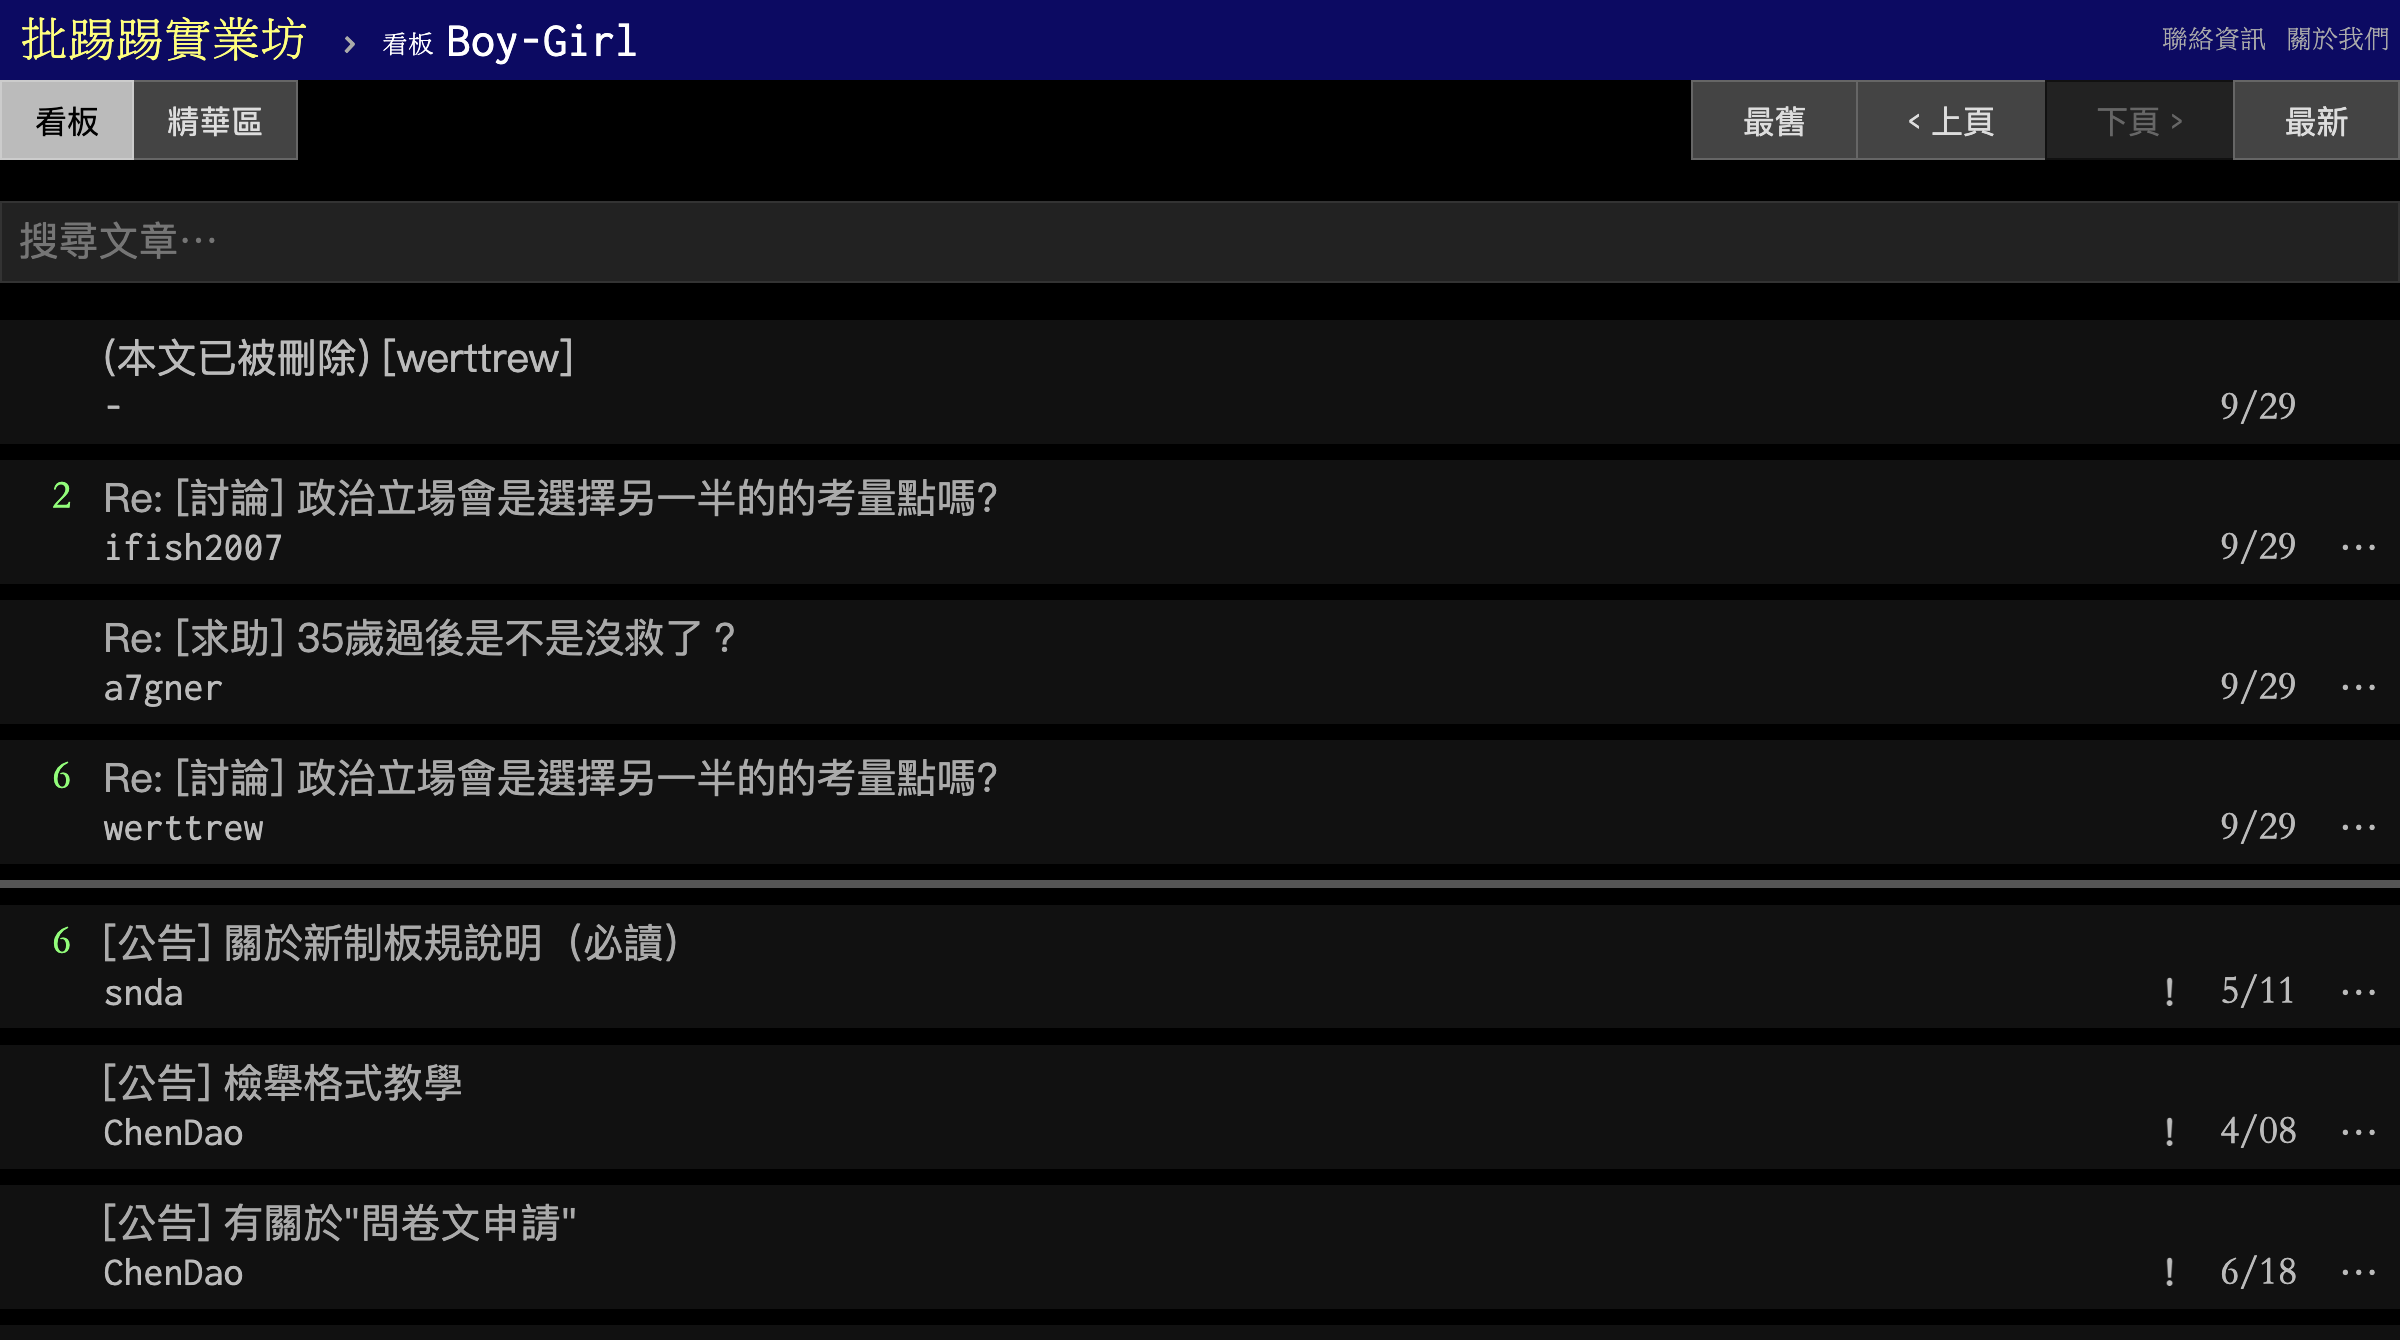

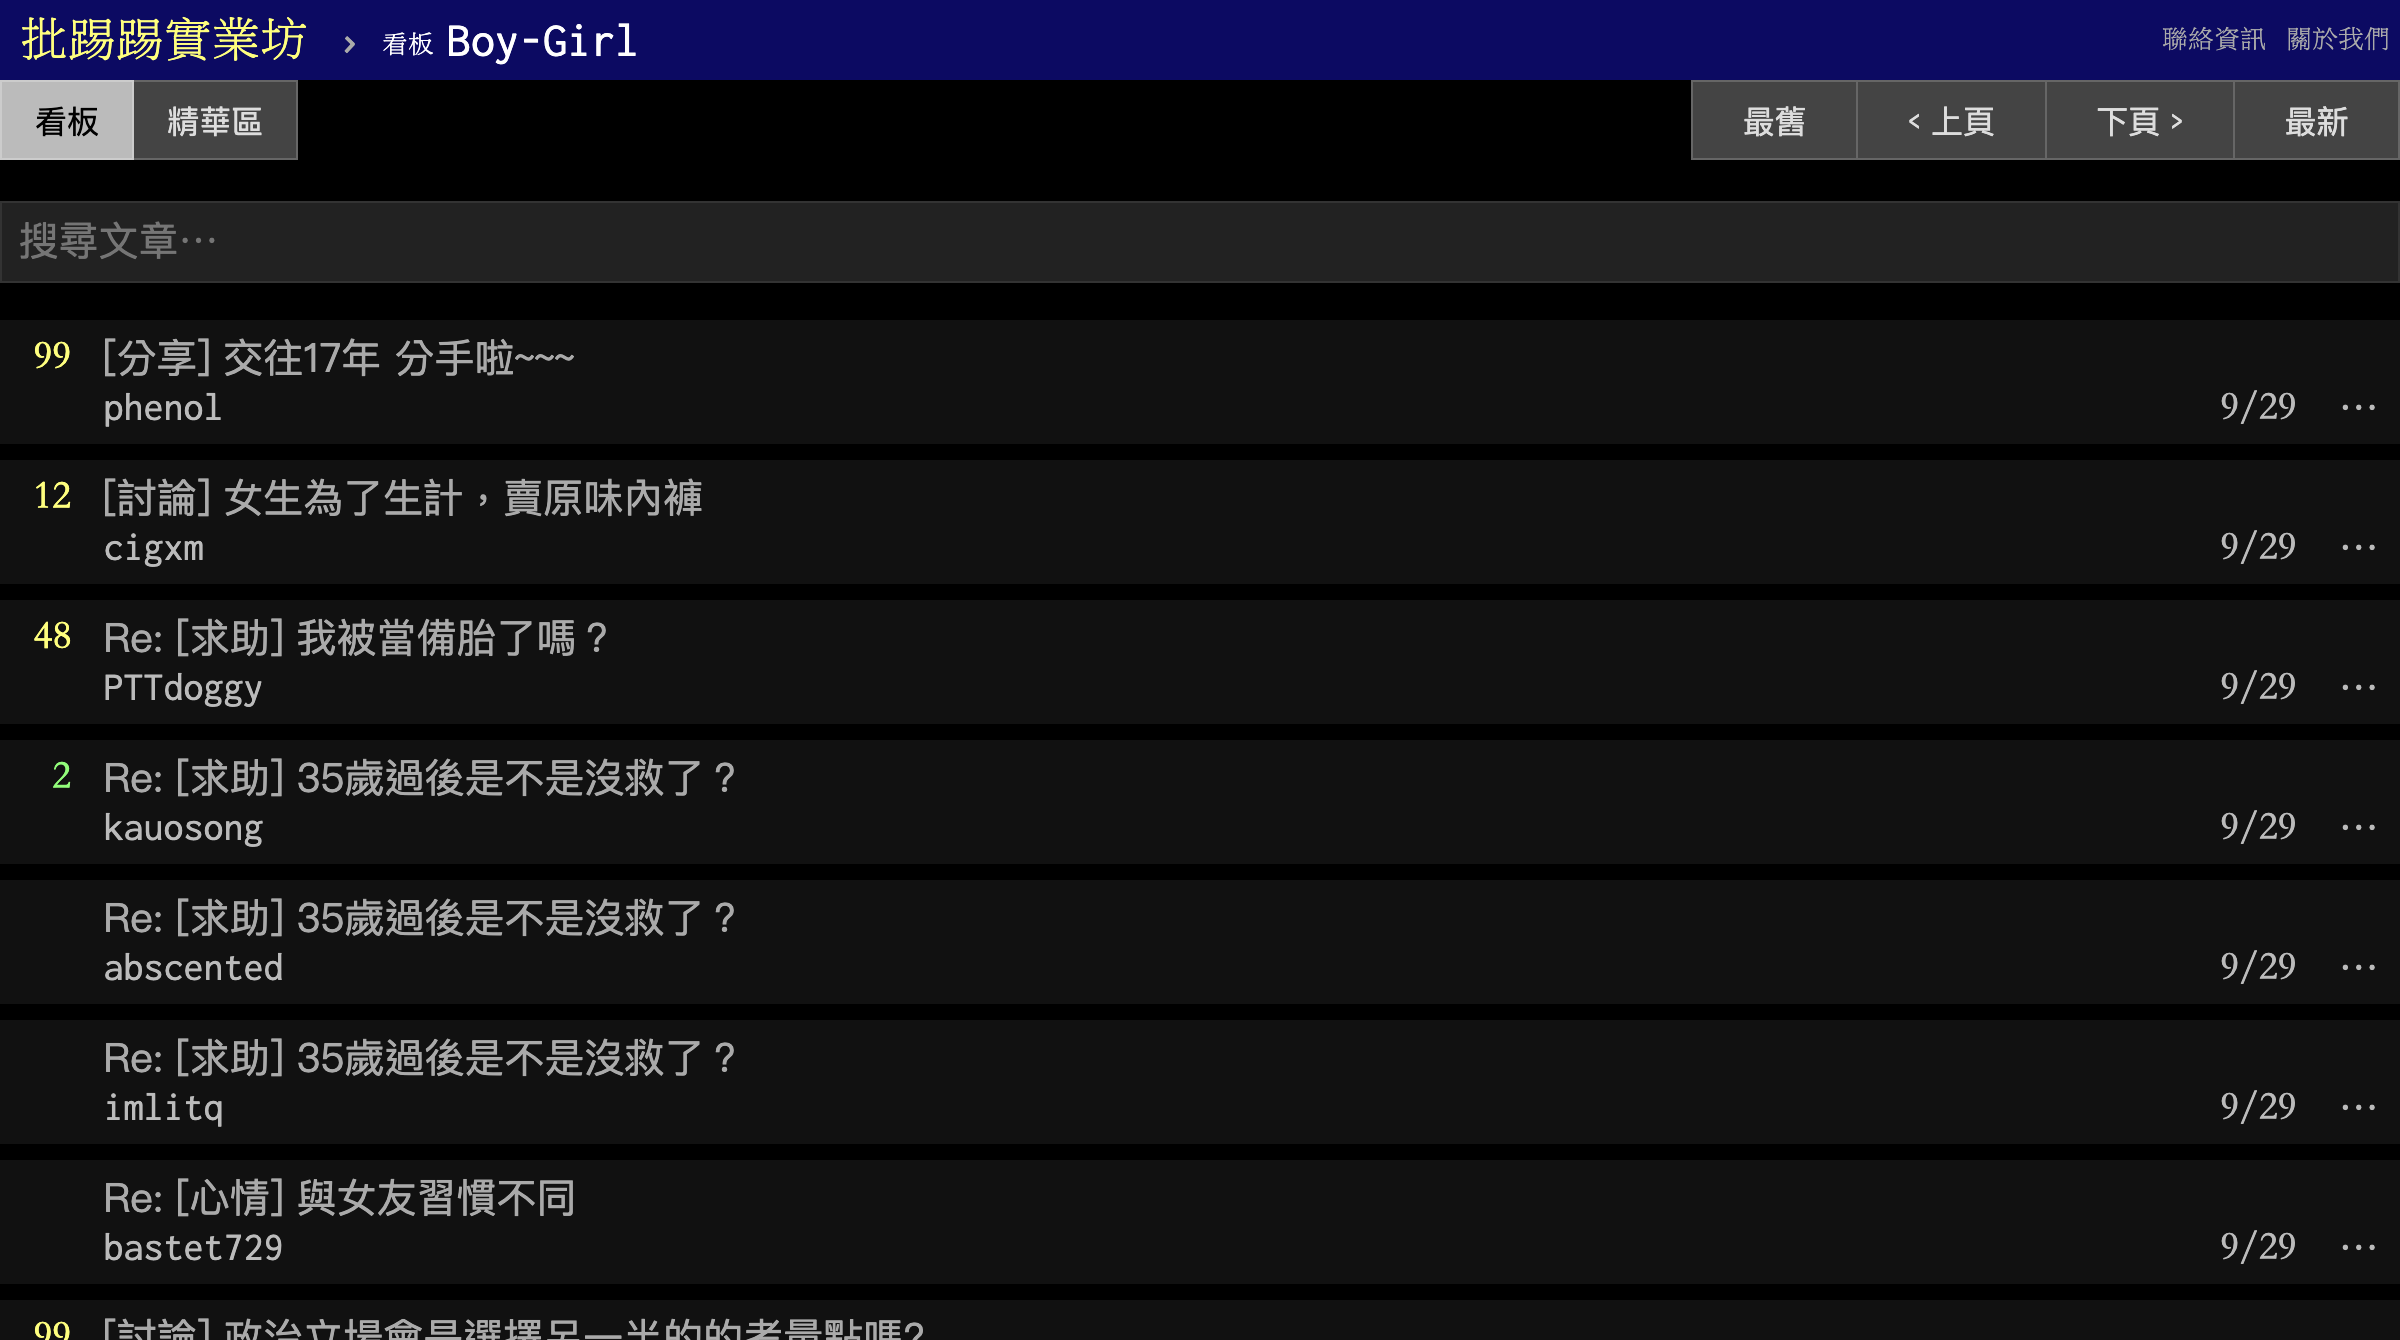

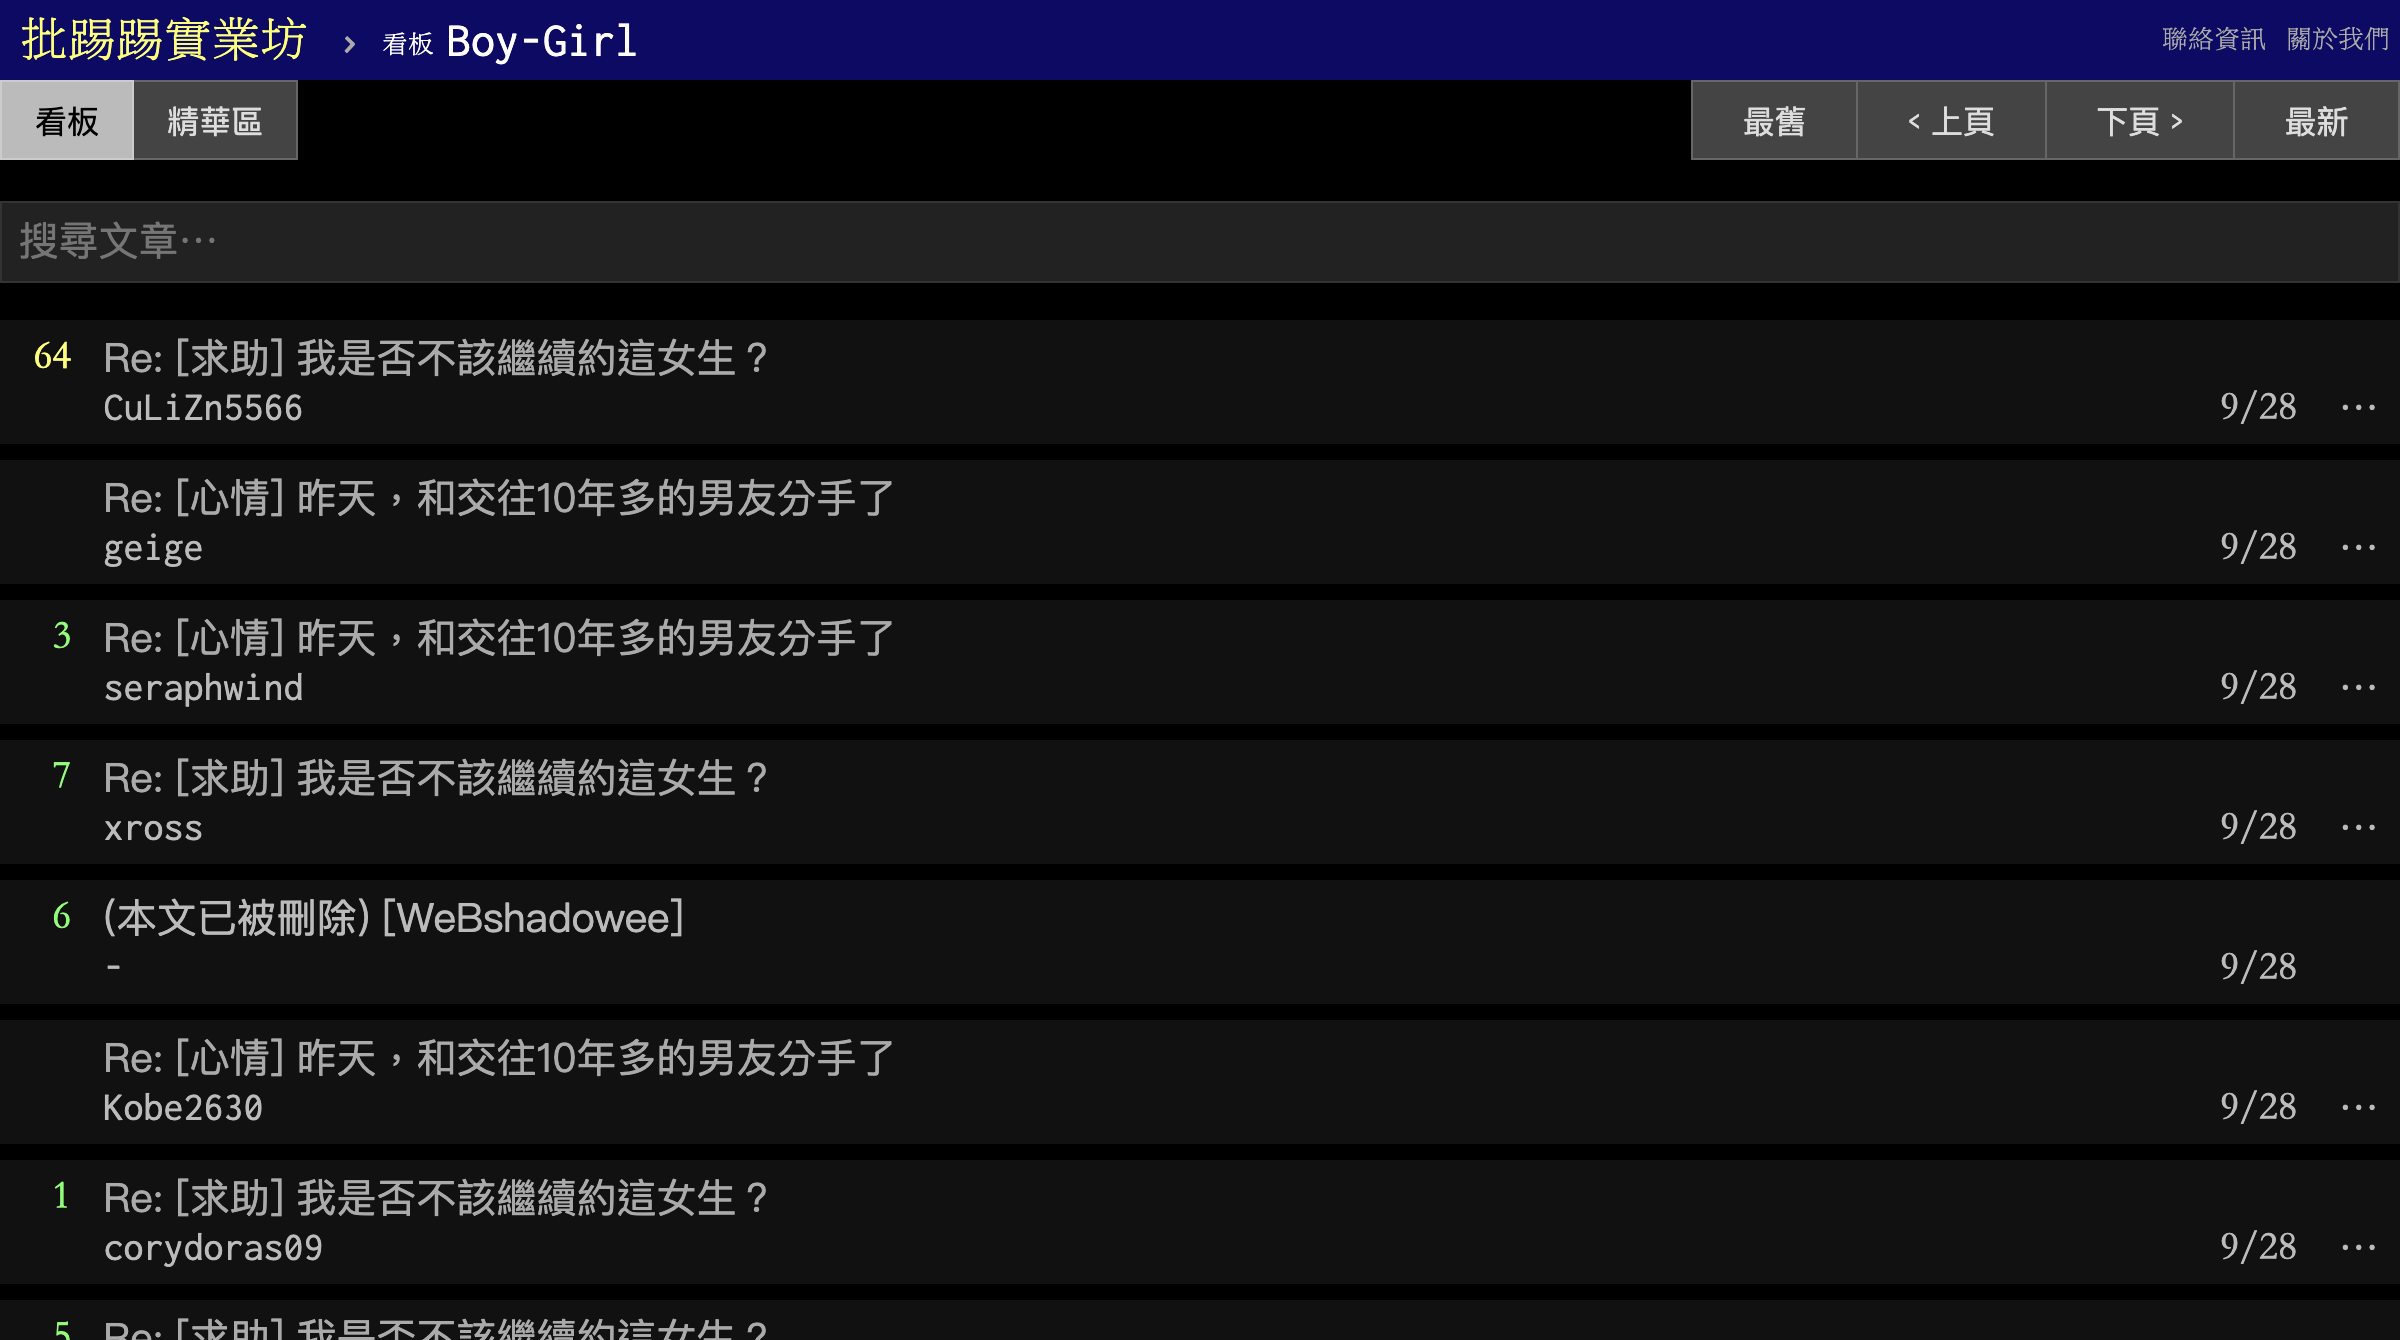

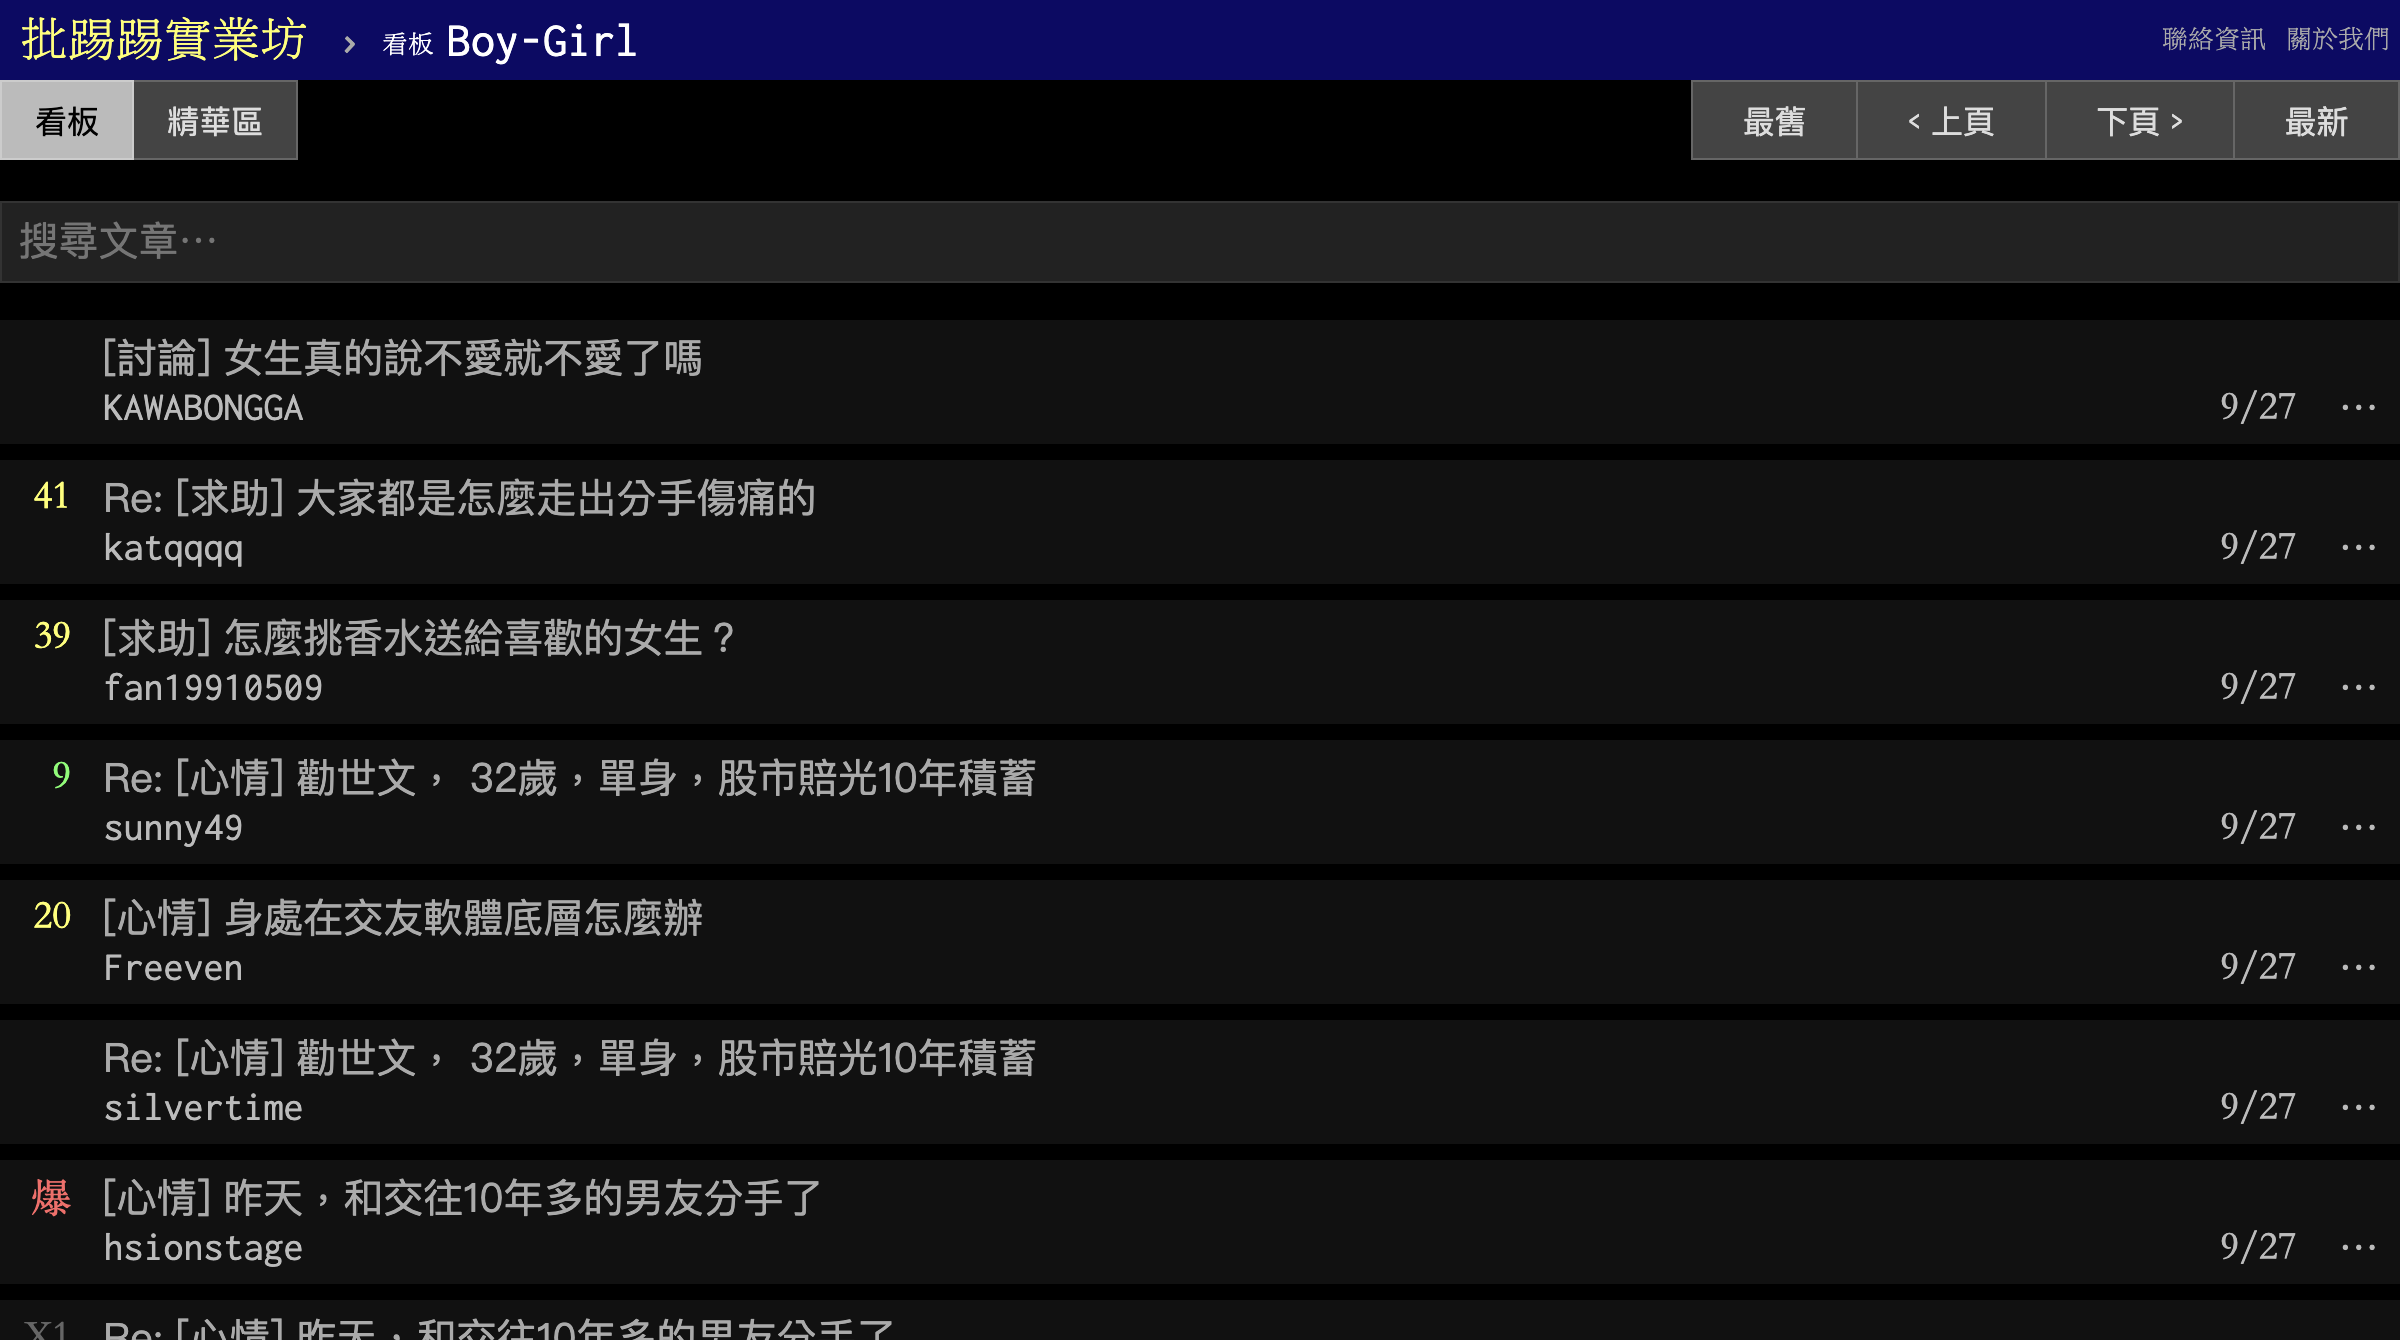

In [112]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from IPython.display import Image


URI = 'https://www.ptt.cc/bbs/Boy-Girl/index.html'
driver = webdriver.Chrome(service = Service("./webdriver/chromedriver version105"))
driver.get(URI)
driver.save_screenshot('page1.png')
display(Image(filename = 'page1.png'))
for i in range(3):
    btn = driver.find_element(By.XPATH, '//div[@class="btn-group btn-group-paging"]//a[2]')
    btn.click()
    driver.save_screenshot(f'page{i + 2}.png')
    display(Image(filename = f'page{i + 2}.png'))
driver.quit()

### Please the HTML version before next Monday (10/3).